In [67]:
import numpy as np
import cv2
import os
import gc
import matplotlib.pyplot as plt
from skimage.feature import learn_gmm
from scipy.stats import norm

In [2]:
def get_videos_from_classes(dataset_path, classes_to_include):
    # Filter the classes to include only those in the provided list
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and d in classes_to_include]

    # List all video files and their corresponding classes
    all_videos = []
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        video_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        for video_file in video_files:
            all_videos.append((os.path.join(class_path, video_file), class_name))

    return all_videos

def load_videos(video_list):
    # Initialize the lists for storing videos and labels
    X = []
    y = []

    for video_path, class_name in video_list:
        # Read the video using cv2
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Error opening video file {video_path}")
            continue

        frames = []
        # Process the video frame by frame
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            # Convert frame to grayscale
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(frame_gray)

        # Release the video capture object
        cap.release()

        # Store the frames and the corresponding label
        X.append(frames)
        y.append(class_name)

    return X, y



In [195]:
dataset_path = 'dataset/test'
classes_to_include = ['Skiing', 'Surfing', 'PullUps']  


video_list = get_videos_from_classes(dataset_path, classes_to_include)

X, y = load_videos(video_list)


print(f"Number of videos: {len(X)}")
if X:
    print(f"Shape of the first video: {len(X[0])} frames of size {X[0][0].shape}")


Number of videos: 46
Shape of the first video: 178 frames of size (240, 320)


In [257]:
gaussians = []
i =0 
for video in X:
    intensities_dict = {}
    for frame in video:
        flattened_frame = frame.flatten()
        unique_values, counts = np.unique(flattened_frame, return_counts=True)
        for value, count in zip(unique_values, counts):
            if value in intensities_dict:
                intensities_dict[value] += count
            else:
                intensities_dict[value] = count
    i+= 1
    if(i ==122):
        break

intensities_dict

{1: 15099,
 2: 17636,
 3: 18299,
 4: 14512,
 5: 11399,
 12: 1464,
 13: 698,
 15: 2217,
 16: 1932,
 17: 1922,
 18: 1838,
 19: 2045,
 20: 587,
 21: 1655,
 22: 3106,
 23: 4087,
 24: 4359,
 25: 5126,
 26: 6739,
 27: 2137,
 28: 4006,
 29: 6805,
 30: 6931,
 31: 7047,
 32: 7222,
 33: 7219,
 34: 2266,
 35: 5397,
 36: 8414,
 37: 10075,
 38: 10383,
 39: 12486,
 40: 13083,
 41: 3277,
 42: 12056,
 43: 22393,
 44: 23475,
 45: 19286,
 46: 16305,
 47: 16243,
 48: 5435,
 49: 10630,
 50: 13118,
 51: 12881,
 52: 12994,
 53: 12004,
 54: 11546,
 55: 2033,
 56: 8613,
 57: 9683,
 58: 9871,
 59: 9716,
 60: 9744,
 61: 8862,
 62: 1790,
 63: 8874,
 64: 10363,
 65: 8717,
 66: 9071,
 67: 10479,
 68: 9911,
 69: 2858,
 70: 8358,
 71: 12472,
 72: 16402,
 73: 19826,
 74: 21416,
 75: 24305,
 76: 4148,
 77: 20673,
 78: 32601,
 79: 31736,
 80: 47937,
 81: 45667,
 82: 54421,
 83: 8329,
 84: 46030,
 85: 68222,
 86: 71298,
 87: 84409,
 88: 85907,
 89: 100403,
 90: 110067,
 91: 20986,
 92: 90526,
 93: 115592,
 94: 122653,
 

In [261]:
appended_intensities = []
for idx, value in enumerate(intensities_dict.values()):
    appended_intensities.extend([idx]*value)
appended_intensities = np.array(appended_intensities)
gmm = learn_gmm(appended_intensities.reshape((-1,1)),n_modes=12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


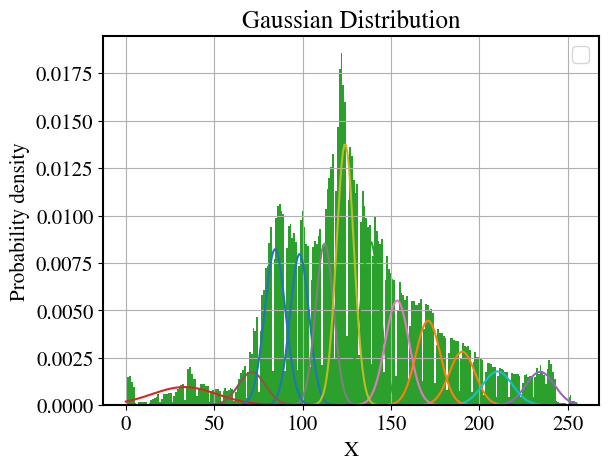

In [262]:
for mu,sigma,weight in zip(gmm.means_,gmm.covariances_ ** 0.5,gmm.weights_):
    x = np.linspace(0, 255, 300)
    plt.plot(x, weight*norm.pdf(x,mu,sigma))
plt.hist(appended_intensities,range=(0,255),bins=256,density=True)
plt.title('Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.show()
